<a href="https://colab.research.google.com/github/jotihicks/Credit-card-scam-project-Mayfly-Pelican-/blob/main/Credit_card_scam_project_Using_Mayfly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Problem Definition**

In [1]:
# Data Manipulation
import pandas as pd
import numpy as np
import tensorflow as tf
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px  # For high-level visualization with Plotly
import plotly.graph_objects as go  # For low-level customization with Plotly
# Modeling
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import xgboost as xgb
import lightgbm as lgb
import torch
import torch.nn as nn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# **Loading Dataset**

In [2]:
df = pd.read_excel('/content/drive/MyDrive/creditcard.xlsx')

In [3]:
df2 = pd.read_csv('/content/drive/MyDrive/Credit card folder/creditcard_Test_1_2023.csv')
df3 = pd.read_csv('/content/drive/MyDrive/Credit card folder/creditcard_test_data_2.csv')
df4 = pd.read_csv('/content/drive/MyDrive/Credit card folder/Creditcard_test_data_3.csv')

In [4]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [5]:
df2.head(10)

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0
5,5,0.025302,-0.140514,1.191138,-0.707979,0.430490,0.458973,0.611050,-0.092629,0.180811,...,-0.187739,-0.538518,-0.050465,-0.631553,-0.456480,0.252670,0.066681,0.095812,6901.49,0
6,6,1.016482,-0.397181,0.497868,-0.144463,0.331022,0.629243,0.431262,-0.134007,0.796159,...,-0.171137,-0.287017,-0.178197,-1.297597,1.182503,-0.604228,-0.198163,-0.087619,18954.45,0
7,7,-0.051306,-0.007194,1.139941,-0.877880,0.684668,0.714326,0.892615,-0.908409,0.901938,...,0.620676,-0.920426,0.034660,-1.091527,-0.742075,-0.104863,-1.382522,-2.748268,12298.23,0
8,8,-0.130680,-0.349547,0.425786,-0.760444,1.702777,2.324816,0.568968,0.049100,0.273118,...,-0.132787,-0.284700,-0.227779,2.248754,0.534846,-0.929738,-0.224385,0.243790,22052.90,0
9,9,0.058419,-0.093507,1.117270,-0.735172,0.466111,0.332371,0.683425,-0.136674,0.096409,...,-0.203634,-0.601581,-0.145082,-0.654783,-0.196621,0.226818,0.057119,0.100629,210.35,0


In [6]:
df3.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [7]:
df.tail(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284797,172782,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,...,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,5.49,0
284798,172782,0.219529,0.881246,-0.635891,0.960928,-0.152971,-1.014307,0.427126,0.121340,-0.285670,...,0.099936,0.337120,0.251791,0.057688,-1.508368,0.144023,0.181205,0.215243,24.05,0
284799,172783,-1.775135,-0.004235,1.189786,0.331096,1.196063,5.519980,-1.518185,2.080825,1.159498,...,0.103302,0.654850,-0.348929,0.745323,0.704545,-0.127579,0.454379,0.130308,79.99,0
284800,172784,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,...,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,2.68,0
284801,172785,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0
284802,172786,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [8]:
df.describe

print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

Dataset contains 284807 rows and 31 columns.


In [9]:
df.ndim

2

In [10]:
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Check for duplicate rows
print(f"Number of duplicate rows: {df.duplicated().sum()}")

# Display summary statistics
print(df.describe().transpose())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  int64  
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# **Univariate Analysis**

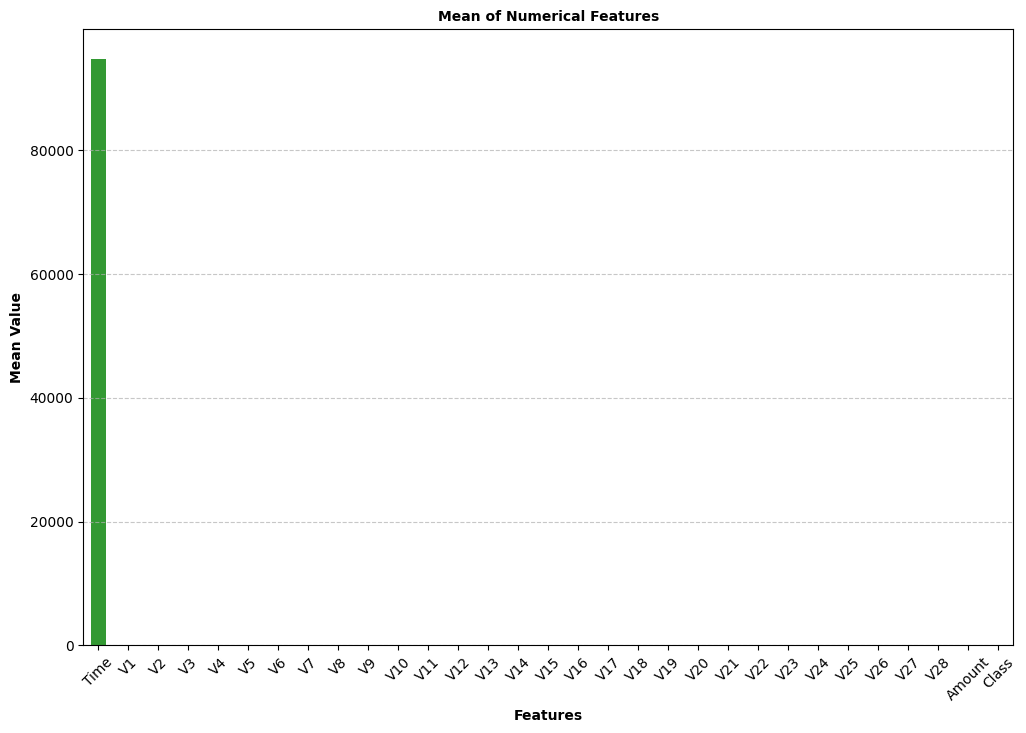

In [11]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns

# Calculate the mean of each numerical column
numerical_means = df[numerical_cols].mean()

# Create a bar plot
plt.figure(figsize=(12, 8))
numerical_means.plot(kind='bar', color='green', alpha=0.8)
plt.title("Mean of Numerical Features", fontsize=10, fontweight='bold')
plt.ylabel("Mean Value", fontsize=10, fontweight='bold')
plt.xlabel("Features", fontsize=10, fontweight='bold')
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Categorical Features:

In [12]:
# Count plots for categorical columns
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=df[col], palette='viridis')
    plt.title(f"Count Plot of {col}")
    plt.show(10)


# **Bivariate Analysis**

In [ ]:
# Pairplot for numerical features and target variable
sns.pairplot(df, hue='Amount', diag_kind='kde')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
sns.kdeplot(df['Amount'], cumulative=True, color='teal')
plt.title("Cumulative KDE Plot")
plt.show()

In [ ]:
# distribution of legit transactions & fraudulent transactions
df['Class'].value_counts()

In [ ]:
# Set up figure size
plt.figure(figsize=(15, 10))

# Plot histograms for numerical columns
df.hist(figsize=(15, 12), bins=50, edgecolor='black')
plt.suptitle("Feature Distributions Before Preprocessing", fontsize=16)
plt.show()

# Boxplots to detect outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, orient="h", palette="Set2")
plt.title("Boxplots of Features Before Preprocessing", fontsize=12)
plt.show()

# Display summary statistics
print("Summary Statistics:")
print(df.describe())

# **Data Preprocessing and feature Engineering for Mayfly Algorithm**

In [ ]:
# features & target
X = df.drop('Class', axis=1)
y = df['Class']

# train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [ ]:
# import normally
from sklearn.model_selection import cross_val_score

# define your own alias/wrapper
def ross_val_score(estimator, X, y, cv=3, scoring='roc_auc'):
    """
    A thin wrapper around sklearn.model_selection.cross_val_score,
    here aliased as ross_val_score.
    """
    return cross_val_score(estimator, X, y, cv=cv, scoring=scoring)

# use it in fitness
def fitness(params):
    max_depth, min_samples_split = params
    clf = DecisionTreeClassifier(
        max_depth=int(max_depth),
        min_samples_split=int(min_samples_split),
        random_state=42
    )
    return ross_val_score(clf, X_train, y_train).mean()


In [ ]:
# Mayfly Optimizer Class
from sklearn.tree            import DecisionTreeClassifier
import random


class MayflyOptimizer:
    def __init__(self, pop_size=20, n_iter=30, bounds=[(1,20),(2,100)]):
        self.pop_size = pop_size
        self.n_iter   = n_iter
        self.bounds   = bounds
        self.dim      = len(bounds)

    def _init_population(self):
        return np.array([
            [random.uniform(lb, ub) for lb, ub in self.bounds]
            for _ in range(self.pop_size)
        ])

    def optimize(self):
        males      = self._init_population()
        velocities = np.zeros_like(males)
        females    = males.copy()
        best_params, best_score = None, -np.inf

        for t in range(self.n_iter):
            # PSO‐style male update
            for i in range(self.pop_size):
                velocities[i] += random.random() * (females[i] - males[i])
                males[i]     += velocities[i]
                # enforce bounds
                for d in range(self.dim):
                    lb, ub = self.bounds[d]
                    males[i, d] = np.clip(males[i, d], lb, ub)

            # female attracted to the best male
            male_scores = [fitness(m) for m in males]
            best_male   = males[np.argmax(male_scores)]
            for i in range(self.pop_size):
                females[i] += random.random() * (best_male - females[i])

            # evaluate females
            for ind in females:
                score = fitness(ind)
                if score > best_score:
                    best_score, best_params = score, ind.copy()

        return best_params, best_score



In [ ]:
# Imports & Parallel setup
from joblib import Parallel, delayed
import random


In [ ]:
# Cell 2: Vectorized MayflyOptimizer
class FastMayflyOptimizer:
    def __init__(self, pop_size=25, n_iter=20, bounds=[(1,20),(2,100)], n_jobs=-1):
        self.pop_size = pop_size
        self.n_iter   = n_iter
        self.bounds   = np.array(bounds)         # shape (dim, 2)
        self.dim      = len(bounds)
        self.n_jobs   = n_jobs

    def _init_population(self):
        # sample uniformly in each dimension
        lows  = self.bounds[:, 0]
        highs = self.bounds[:, 1]
        return np.random.uniform(lows, highs, size=(self.pop_size, self.dim))

    def optimize(self):
        # init
        males      = self._init_population()
        velocities = np.zeros_like(males)
        females    = males.copy()
        best_params = None
        best_score  = -np.inf

        for _ in range(self.n_iter):
            # --- 1) Update males (vectorized) ---
            r1 = np.random.rand(self.pop_size, self.dim)
            velocities += r1 * (females - males)
            males      += velocities

            # clip to bounds
            lows  = self.bounds[:, 0]
            highs = self.bounds[:, 1]
            males = np.clip(males, lows, highs)

            # --- 2) Compute male fitness in parallel ---
            male_scores = np.array(
                Parallel(n_jobs=self.n_jobs)(
                    delayed(fitness)(m) for m in males
                )
            )
            best_idx = male_scores.argmax()
            best_male = males[best_idx]

            # --- 3) Update females towards best male ---
            r2 = np.random.rand(self.pop_size, self.dim)
            females += r2 * (best_male - females)

            # --- 4) Compute female fitness and track global best ---
            female_scores = np.array(
                Parallel(n_jobs=self.n_jobs)(
                    delayed(fitness)(f) for f in females
                )
            )
            # find any new global best
            idx = female_scores.argmax()
            if female_scores[idx] > best_score:
                best_score  = female_scores[idx]
                best_params = females[idx].copy()

        return best_params, best_score


In [ ]:
# Install Optuna into your current environment
%pip install optuna

import optuna
from sklearn.model_selection import cross_val_score

def objective(trial):
    d = trial.suggest_int('max_depth', 1, 20)
    s = trial.suggest_int('min_samples_split', 2, 100)
    clf = DecisionTreeClassifier(max_depth=d, min_samples_split=s, random_state=42)
    return cross_val_score(clf, X_train, y_train, cv=3, scoring='roc_auc', n_jobs=1).mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50, n_jobs=4)
print(study.best_params, study.best_value)


In [ ]:
from sklearn.metrics         import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_auc_score
)
from sklearn.model_selection import learning_curve

# Best hyperparameters from Optuna
best_max_depth        = 11
best_min_samples_split = 100

# Final classifier
clf_final = DecisionTreeClassifier(
    max_depth=best_max_depth,
    min_samples_split=best_min_samples_split,
    random_state=42
)

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose       import ColumnTransformer

# Suppose X_train, X_test already exist
numeric_features     = X_train.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X_train.select_dtypes(include=["object","category"]).columns.tolist()

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numeric_features),
    ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical_features),
])

# Fit & transform
X_train_proc = preprocessor.fit_transform(X_train)
X_test_proc  = preprocessor.transform(X_test)


In [ ]:
# Fit, evaluation report & additional metrics

# Fit & predict
clf_final.fit(X_train_proc, y_train)
y_pred  = clf_final.predict(X_test_proc)
y_proba = clf_final.predict_proba(X_test_proc)[:, 1]

# Classification report
from sklearn.metrics import classification_report
print("=== Classification Report ===\n")
print(classification_report(y_test, y_pred))

# Additional metrics
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    r2_score
)

acc     = accuracy_score(y_test, y_pred)
prec    = precision_score(y_test, y_pred)
rec     = recall_score(y_test, y_pred)
f1      = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
r2      = r2_score(y_test, y_proba)

print("Test set results:")
print(f"  Accuracy : {acc:.4f}")
print(f"  Precision: {prec:.4f}")
print(f"  Recall   : {rec:.4f}")
print(f"  F1 Score : {f1:.4f}")
print(f"  ROC AUC  : {roc_auc:.4f}")
print(f"  R² (proba): {r2:.4f}")


In [ ]:
# Learning Curve (AUC vs. training set size)
train_sizes, train_scores, val_scores = learning_curve(
    estimator=clf_final,
    X=X_train_proc,
    y=y_train,
    cv=5,
    scoring="roc_auc",
    train_sizes=np.linspace(0.1, 1.0, 5),
    n_jobs=-1,
    shuffle=True,
    random_state=42
)

# compute mean±std
train_mean = np.mean(train_scores, axis=1)
train_std  = np.std(train_scores,  axis=1)
val_mean   = np.mean(val_scores,   axis=1)
val_std    = np.std(val_scores,    axis=1)

# plot
plt.figure(figsize=(6,4))
plt.plot(train_sizes, train_mean, label="Train AUC")
plt.fill_between(train_sizes,
                 train_mean - train_std,
                 train_mean + train_std,
                 alpha=0.2)
plt.plot(train_sizes, val_mean, label="Validation AUC")
plt.fill_between(train_sizes,
                 val_mean - val_std,
                 val_mean + val_std,
                 alpha=0.2)
plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("ROC AUC")
plt.legend(loc="best")
plt.tight_layout()
plt.show()


In [ ]:
# Confusion Matrix Plot
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf_final.classes_)

fig, ax = plt.subplots(figsize=(5,5))
disp.plot(ax=ax, cmap='Blues', colorbar=True)
ax.set_title("Confusion Matrix")
plt.tight_layout()
plt.show()


# **Save Model**

In [ ]:
# Save model & pipeline

import joblib
from sklearn.pipeline import Pipeline

# Save separately
joblib.dump(preprocessor, 'mayfly preprocessor.joblib')
joblib.dump(clf_final,    'mayfly clf_final.joblib')

# Also Bundle into one Pipeline and save
full_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier',    clf_final)
])
joblib.dump(full_pipeline, 'mayfly model_pipeline.joblib')


In [ ]:
# Code to Load model & pipeline

import joblib

# If you saved separately:
preprocessor = joblib.load('preprocessor.joblib')
clf_final    = joblib.load('clf_final.joblib')

# If you saved the bundled pipeline:
full_pipeline = joblib.load('model_pipeline.joblib')

# Then predict with:
# preds = full_pipeline.predict(X_new)
# proba = full_pipeline.predict_proba(X_new)[:,1]


# **Exploratory Data Analysis on Data Two**

In [ ]:
df2.head()

In [ ]:
df2.describe()

In [ ]:
df2.shape

In [ ]:
# Understanding the Data.

def column_summary(df2):
    # Return a new DataFrame with summarized information about the columns of 'df'.
    return pd.DataFrame({
        'Data Type': df2.dtypes,  # Retrieve the data type of each column (e.g., int64, object).
        'Missing Values': df2.isnull().sum(),  # Count the number of missing
        'Unique Values': df2.nunique(),  # Count the number of unique values in each column.
        'Memory Usage (bytes)': df2.memory_usage(index=False)  # Calculate memory usage for each column (excluding the index).
    })
# print the resulting DataFrame.
print(column_summary(df2))


There are no missing Values in Data two

# **Testing The Mayfly Model with The Second Dataset**

In [ ]:
# Cell 1: Imports and load the saved model
import joblib
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    r2_score,
)

# Replace the path below with wherever your model file resides
MODEL_PATH = "/content/drive/MyDrive/Credit card folder/mayfly clf_final.joblib"
model = joblib.load(MODEL_PATH)
print(f"Loaded model: {model}")


In [ ]:
# Split df2 into Train and Test

TARGET_COLUMN = "Class"

# Split into X_new and y_new
X_new = df2.drop(columns=[TARGET_COLUMN])
y_new = df2[TARGET_COLUMN]

In [ ]:
# Make predictions and compute evaluation metrics

# 1. Generate class predictions
y_pred = model.predict(X_new)

# 2. If model supports predict_proba (e.g. classification), get probabilities for ROC‐AUC
try:
    y_proba = model.predict_proba(X_new)[:, 1]
    has_proba = True
except AttributeError:
    has_proba = False

# 3. Compute common classification metrics
acc = accuracy_score(y_new, y_pred)
prec = precision_score(y_new, y_pred, zero_division=0)
rec = recall_score(y_new, y_pred, zero_division=0)
f1 = f1_score(y_new, y_pred, zero_division=0)

print("Test set results:")
print(f"  Accuracy : {acc:.4f}")
print(f"  Precision: {prec:.4f}")
print(f"  Recall   : {rec:.4f}")
print(f"  F1 Score : {f1:.4f}")

if has_proba:
    roc_auc = roc_auc_score(y_new, y_proba)
    r2 = r2_score(y_new, y_proba)  # R² on probabilities
    print(f"  ROC AUC  : {roc_auc:.4f}")
    print(f"  R²       : {r2:.4f}")
else:
    r2 = r2_score(y_new, y_pred)   # R² on predicted classes
    print(f"  R²       : {r2:.4f}")

# 4. (Optional) Display confusion matrix
cm = confusion_matrix(y_new, y_pred)
print("\nConfusion Matrix:")
print(cm)


In [ ]:
from sklearn.model_selection import learning_curve

# Choose the range of training‐set sizes (e.g., 10%, 20%, … 100% of your data)
train_sizes, train_scores, val_scores = learning_curve(
    estimator=model,
    X=X_new,
    y=y_new,
    train_sizes=np.linspace(0.1, 1.0, 10),  # 10 steps from 10% to 100%
    cv=5,                                   # 5‐fold cross‐validation
    scoring='accuracy',                     # or another metric of interest
    n_jobs=-1                               # use all G PU cores
)

# Compute the mean and standard deviation across folds
train_mean = np.mean(train_scores, axis=1)
train_std  = np.std(train_scores, axis=1)
val_mean   = np.mean(val_scores, axis=1)
val_std    = np.std(val_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Training score')
plt.fill_between(
    train_sizes,
    train_mean - train_std,
    train_mean + train_std,
    alpha=0.2
)
plt.plot(train_sizes, val_mean, label='Validation score')
plt.fill_between(
    train_sizes,
    val_mean - val_std,
    val_mean + val_std,
    alpha=0.2
)

plt.title('Learning Curve')
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)  # optional: add grid lines
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Plotting Confusion Matrix
cm = confusion_matrix(y_new, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)

fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(ax=ax, cmap=None)   # Let matplotlib pick default colors
ax.set_title("Confusion Matrix on df2")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.tight_layout()
plt.show()


## Parameter Tuning with sigmoid on second dataset

In [ ]:
from sklearn.calibration import CalibratedClassifierCV
# 1) Using the 'estimator' keyword
calibrator = CalibratedClassifierCV(
    estimator=model,
    method="sigmoid",
    cv=5
)

# 2) Passing your model as the first positional argument
# calibrator = CalibratedClassifierCV(model, method="sigmoid", cv=5)

calibrator.fit(X_new, y_new)
print("Calibration (sigmoid) complete.")


In [ ]:
# Cell 5: Generate calibrated probabilities on X_new
y_proba_calibrated = calibrator.predict_proba(X_new)[:, 1]

In [ ]:
# Cell 6: Tune the classification threshold to maximize F1 on (X_new, y_new)
thresholds = np.linspace(0.00, 1.00, 101)
f1_scores = []
for t in thresholds:
    y_pred_thresh = (y_proba_calibrated >= t).astype(int)
    f1_scores.append(f1_score(y_new, y_pred_thresh, zero_division=0))

best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
best_f1 = f1_scores[best_idx]

print(f"Best threshold = {best_threshold:.2f}, F1 = {best_f1:.4f}")


In [ ]:
# Cell 7: Make final predictions at the tuned threshold
y_pred_final = (y_proba_calibrated >= best_threshold).astype(int)


In [ ]:
# Cell 8: Compute and print evaluation metrics using the calibrated probabilities

acc     = accuracy_score(y_new, y_pred_final)
prec    = precision_score(y_new, y_pred_final, zero_division=0)
rec     = recall_score(y_new, y_pred_final, zero_division=0)
f1      = f1_score(y_new, y_pred_final, zero_division=0)
roc_auc = roc_auc_score(y_new, y_proba_calibrated)
r2      = r2_score(y_new, y_proba_calibrated)

print("Calibrated + Threshold-tuned results:")
print(f"  Accuracy : {acc:.4f}")
print(f"  Precision: {prec:.4f}")
print(f"  Recall   : {rec:.4f}")
print(f"  F1 Score : {f1:.4f}")
print(f"  ROC AUC  : {roc_auc:.4f}")
print(f"  R² (proba): {r2:.4f}")

cm = confusion_matrix(y_new, y_pred_final)
print("\nConfusion Matrix at threshold", best_threshold)
print(cm)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

#  Assume:
#   • y_true = y_new         (true labels for your test set)
#   • y_probs = y_proba_calibrated  (predicted probabilities)

thresholds = np.linspace(0.0, 1.0, 101)  # 0.00, 0.01, 0.02, …, 1.00

acc_list  = []
prec_list = []
rec_list  = []

for thr in thresholds:
    y_pred_thr = (y_probs >= thr).astype(int)
    acc_list.append(accuracy_score(y_true, y_pred_thr))
    prec_list.append(precision_score(y_true, y_pred_thr, zero_division=0))
    rec_list.append(recall_score(y_true, y_pred_thr, zero_division=0))

plt.figure(figsize=(8, 6))
plt.plot(thresholds, acc_list,  label="Accuracy")
plt.plot(thresholds, prec_list, label="Precision")
plt.plot(thresholds, rec_list,  label="Recall")
plt.xlabel("Decision threshold")
plt.ylabel("Score")
plt.title("Accuracy/Precision/Recall vs Decision Threshold")
plt.legend(loc="best")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 1. Compute confusion matrix after Parameter tunning
cm = confusion_matrix(y_new, y_pred_final)

# 2. Print the raw matrix
print(f"\nConfusion Matrix at threshold {best_threshold}:")
print(cm)

# 3. (Optional) Display as a heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title(f"Confusion Matrix after Parameter tunning (threshold = {best_threshold:.2f})")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()


# **Exploratory Data Analysis on Data Three**

In [ ]:
df3.head()

In [ ]:
df3.describe()

In [ ]:
df3.shape

In [ ]:
# Understanding the Data.

def column_summary(df3):
    # Return a new DataFrame with summarized information about the columns of 'df'.
    return pd.DataFrame({
        'Data Type': df3.dtypes,  # Retrieve the data type of each column (e.g., int64, object).
        'Missing Values': df3.isnull().sum(),  # Count the number of missing
        'Unique Values': df3.nunique(),  # Count the number of unique values in each column.
        'Memory Usage (bytes)': df3.memory_usage(index=False)  # Calculate memory usage for each column (excluding the index).
    })
# print the resulting DataFrame.
print(column_summary(df3))


# **Testing Mayfly with Third Dataset**

In [ ]:
# Split df3 into Train and Test

TARGET_COLUMN = "Class"

# Split into X_new and y_new
X_3 = df3.drop(columns=[TARGET_COLUMN])
y_3 = df3[TARGET_COLUMN]

In [ ]:
# Make predictions and compute evaluation metrics

# 1. Generate class predictions
y_pred3 = model.predict(X_3)

# 2. If model supports predict_proba (e.g. classification), get probabilities for ROC‐AUC
try:
    y_proba3 = model.predict_proba(X_3)[:, 1]
    has_proba = True
except AttributeError:
    has_proba = False

# 3. Compute common classification metrics
acc = accuracy_score(y_3, y_pred3)
prec = precision_score(y_3, y_pred3, zero_division=0)
rec = recall_score(y_3, y_pred3, zero_division=0)
f1 = f1_score(y_3, y_pred3, zero_division=0)

print("Test set results:")
print(f"  Accuracy : {acc:.4f}")# Cell 8: Make predictions on X_3 and compute evaluation metrics against y_3


# 1. Generate class predictions on X_3
y_pred3 = model.predict(X_3)

# 2. If model supports predict_proba, get probabilities for ROC‐AUC
try:
    y_proba3 = model.predict_proba(X_3)[:, 1]
    has_proba = True
except AttributeError:
    has_proba = False

# 3. Compute common classification metrics (all measured against y_3)
acc  = accuracy_score(y_3, y_pred3)
prec = precision_score(y_3, y_pred3, zero_division=0)
rec  = recall_score(y_3, y_pred3, zero_division=0)
f1   = f1_score(y_3, y_pred3, zero_division=0)

print("Test set results:")
print(f"  Accuracy : {acc:.4f}")
print(f"  Precision: {prec:.4f}")
print(f"  Recall   : {rec:.4f}")
print(f"  F1 Score : {f1:.4f}")

if has_proba:
    # Use y_3 (not y_new!) since y_proba comes from X_3
    roc_auc = roc_auc_score(y_3, y_proba3)
    r2      = r2_score(y_3, y_proba3)  # R² on probabilities
    print(f"  ROC AUC  : {roc_auc:.4f}")
    print(f"  R²       : {r2:.4f}")
else:
    # If no probabilities are available, fall back to R² on the binary predictions
    r2 = r2_score(y_3, y_pred3)
    print(f"  R²       : {r2:.4f}")

# 4. Display confusion matrix (also against y_3)
cm = confusion_matrix(y_3, y_pred3)
print("\nConfusion Matrix:")
print(cm)

print(f"  Precision: {prec:.4f}")
print(f"  Recall   : {rec:.4f}")
print(f"  F1 Score : {f1:.4f}")

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 1. Compute confusion matrix using y_3 and y_pred
cm = confusion_matrix(y_3, y_pred3)

# 2. Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(ax=ax, cmap="Blues", colorbar=True)

ax.set_title("Confusion Matrix on df3")
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")

plt.show()


In [ ]:
import joblib

# 1.1 Load the saved CalibratedClassifierCV
calibrator = joblib.load('mayfly_calibrator_sigmoid.joblib')

# 1.2 See exactly what column names (and order) the model was trained on:
expected_features = list(calibrator.feature_names_in_)
print("Model expects these features (in this order):")
print(expected_features)


In [ ]:
# Separate features and target
y_3 = df3['Class']
X_3 = df3.drop(columns=['Class'])


In [ ]:
unexpected = [col for col in X_new.columns if col not in expected_features]
missing    = [col for col in expected_features if col not in X_new.columns]


# **Exploratory Data Analysis on Data Four**

In [ ]:
df4.head()

In [ ]:
df4.tail()

In [ ]:
df4.describe()

In [ ]:
df4.info()

In [ ]:
# Understanding the Data.

def column_summary(df4):
    # Return a new DataFrame with summarized information about the columns of 'df'.
    return pd.DataFrame({
        'Data Type': df4.dtypes,  # Retrieve the data type of each column (e.g., int64, object).
        'Missing Values': df4.isnull().sum(),  # Count the number of missing
        'Unique Values': df4.nunique(),  # Count the number of unique values in each column.
        'Memory Usage (bytes)': df4.memory_usage(index=False)  # Calculate memory usage for each column (excluding the index).
    })
# print the resulting DataFrame.
print(column_summary(df4))


# **Testing Mayfly With Fourth Dataset**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split



# 2. Define the dependent (y_4) and independent (X_4) variables
y_4 = df4['isFraud']
X_4 = df4.drop(columns=['isFraud'])

# 3. Drop high-cardinality ID columns that are not directly useful as numeric features
X_4 = X_4.drop(columns=['nameOrig', 'nameDest'])

# 4. One-hot encode any remaining categorical (object) columns
#    In this dataset, "type" is object-typed (e.g. 'PAYMENT', 'TRANSFER', etc.)
X_4 = pd.get_dummies(X_4, columns=['type'], drop_first=True)

# 5. Now X_4 contains only numeric columns:
#    ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest',
#     'type_PAYMENT', 'type_TRANSFER', ...]  (depending on how many types exist)

# 6. Split into train and test sets
#    Stratify on y_4 to preserve the same fraud/non-fraud ratio in both splits
X_4_train, X_4_test, y_4_train, y_4_test = train_test_split(
    X_4,
    y_4,
    test_size=0.20,
    random_state=42,
    stratify=y_4
)

# 7. (Optional) Verify shapes
print("X_4_train shape:", X_4_train.shape)
print("y_4_train shape:", y_4_train.shape)
print("X_4_test  shape:", X_4_test.shape)
print("y_4_test  shape:", y_4_test.shape)


In [ ]:
# 2.1 Print each column’s dtype
print(X_4.dtypes)

# 2.2 Identify only the object (string)/category columns:
non_numeric_cols = X_4.select_dtypes(include=['object', 'category']).columns.tolist()
print("Non-numeric (string) columns in X_4:", non_numeric_cols)


for the last Dataset that was choosen we cant pass 11 inputs in because our model expects 30 inputs